In [1]:
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Bens, b = gpucluster, c = other   ")
location_dict = {'a': "C:\\Users\\heine\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",'c':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)
import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 

data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn import linear_model
# import pickle
import subprocess
import networkx as nx

from Bio import SeqIO
from Bio import SeqFeature as sf
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq

import re

# from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')

what computer are you on? a = Bens, b = gpucluster, c = other   b
base directory is /home/heineike/github/expression_broad_data
Added /home/heineike/github/expression_broad_data to path: 
['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/local/lib/python3.5/dist-packages/cmonkey2-1.2.6-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/SQLAlchemy_Utils-0.32.14-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/svgwrite-1.1.11-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/Routes-2.4.1-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/CherryPy-10.2.2-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/biopython-1.69-py3.5-linux-x86_64.egg', '/usr/local/lib/python3.5/dist-packages/configparser-3.5.0-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/rpy2-2.8.6-py3.5-linux-x86_64.egg', '/usr/local/lib/python3.5/dist-packages/repoze.lru-0.6-py3.5.egg', '

In [2]:
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

# Identify top genes induced by PKA inhibition only in SC. 

In [4]:
#Load cross species comparison data

#YPD data
fname_cross_spec_comparison = data_processing_dir + os.path.normpath("20170817_klscpka/cross_species_compare_ASminus_ASplus_YPD.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)
kl_sc_PKA_data
# with open(fname_cross_spec_comparison, 'rb') as pkl_in:
#      comparison_data = pickle.load(pkl_in)

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,rlog_AS_noNMPP1_YPD_t40_mean_KL,...,padj_SC,rlog_AS_noNMPP1_YPD_t40_mean_SC,rlog_AS_yesNMPP1_YPD_t40_mean_SC,rlog_AS_noNMPP1_YPD_t40_var_SC,rlog_AS_yesNMPP1_YPD_t40_var_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,raw_AS_noNMPP1_YPD_t40_var_SC,raw_AS_yesNMPP1_YPD_t40_var_SC,SC_common_name
0,1,KLLA0E08273g,YIL093C,307.097324,-3.117319,0.391869,-7.955013,1.791132e-15,2.616525e-14,8.023578,...,7.999032e-01,5.864384,6.012012,0.102512,0.153527,1.795921,1.975034,0.026258,0.019171,RSM25
1,1,KLLA0E02179g,YNL323W,596.750877,-0.487211,0.413954,-1.176970,2.392077e-01,3.662996e-01,8.748092,...,8.144010e-01,6.841067,6.690319,1.983754,1.266548,2.075730,2.146700,0.219432,0.176372,LEM3
2,1,KLLA0F12056g,YKR076W,721.339292,5.725890,0.404135,14.168246,1.440529e-45,4.800564e-43,5.529407,...,7.773336e-48,4.965655,8.642741,0.007693,0.014076,1.384101,2.853356,0.005008,0.001150,ECM4
3,1,KLLA0E19691g,YDL174C,32.292002,-0.704536,0.665985,-1.057885,2.901077e-01,4.257787e-01,4.606895,...,1.003400e-10,8.842651,10.535558,0.078743,0.013612,2.609322,3.352513,0.022757,0.002677,DLD1
4,1,KLLA0F20273g,YOR163W,373.122032,0.991374,0.372431,2.661898,7.770147e-03,2.074633e-02,7.353489,...,5.395452e-08,7.264692,8.645844,0.001013,0.063187,2.172017,2.797982,0.001943,0.009904,DDP1
5,1,KLLA0D06127g,YOR246C,300.550233,-0.868219,0.396272,-2.190966,2.845426e-02,6.324328e-02,7.852620,...,5.789574e-07,8.839137,7.382572,0.069640,0.105390,2.717814,2.313137,0.019736,0.016472,ENV9
6,1,KLLA0E07063g,YOL137W,1070.413296,-0.255403,0.442553,-0.577113,5.638634e-01,6.923888e-01,9.647924,...,2.203476e-01,7.471431,7.053748,0.146176,0.083442,2.273729,2.246661,0.008723,0.014864,BSC6
7,1,KLLA0F04499g,YNL067W,938.472171,-4.275055,0.414509,-10.313529,6.121162e-25,2.190472e-23,9.664893,...,1.370800e-11,10.372920,8.550739,0.148571,0.018560,3.156162,2.610781,0.008638,0.004957,RPL9B
8,1,KLLA0C15257g,YDR237W,1161.638190,-2.706933,0.385808,-7.016270,2.278691e-12,2.454541e-11,9.964306,...,7.555303e-01,8.014269,8.158493,0.047859,0.077205,2.434586,2.612835,0.015225,0.008768,MRPL7
9,1,KLLA0E08867g,YNL015W,2927.423587,4.691308,0.454999,10.310592,6.311116e-25,2.243391e-23,7.896321,...,3.481628e-18,3.787630,7.135544,0.127834,0.293084,0.997871,2.378694,0.029605,0.032591,PBI2


In [13]:
#Make fold change subsets: 
#was 7 before
pthreshold_KL = 10e-10
pthreshold_SC = 10e-10

gene_set_dict = io_library.make_foldchange_subsets(kl_sc_PKA_data, pthreshold_KL, pthreshold_SC) 


#visualize my various quadrants for raw pre activation, raw activated and fold change plots.

At an adjusted pvalue threshold of 1.00E-09 for K.Lac and 1.00E-09 for S.Cer, there are 417 genes significant for both species, 211 genes significant for KL only, 399 genes significant for SC only, and 3949 unsignificant genes
Genes that are up in S.Cer and Down in K.Lac
['YPL119C', 'YNL014W']
Genes that are up in K.Lac and Down in S.Cer
[]


In [14]:
pthreshold2_SC = 10e-20   #filter the dataset to include only genes below this threshold

kl_sc_PKA_data_scsigact = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(gene_set_dict['scsig_act'])]
top_scsigact = kl_sc_PKA_data_scsigact[kl_sc_PKA_data_scsigact['padj_SC']<pthreshold2_SC].sort_values(by='log2FoldChange_SC')
print("There are {:d} genes with padj_SC below a threshold of {:.1E} in the top_scsigact dataset".format(len(top_scsigact), pthreshold2_SC) )


There are 85 genes with padj_SC below a threshold of 1.0E-19 in the top_scsigact dataset


In [16]:
top_scsigact[top_scsigact['N SCer Orthologs']==2]

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,rlog_AS_noNMPP1_YPD_t40_mean_KL,...,padj_SC,rlog_AS_noNMPP1_YPD_t40_mean_SC,rlog_AS_yesNMPP1_YPD_t40_mean_SC,rlog_AS_noNMPP1_YPD_t40_var_SC,rlog_AS_yesNMPP1_YPD_t40_var_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,raw_AS_noNMPP1_YPD_t40_var_SC,raw_AS_yesNMPP1_YPD_t40_var_SC,SC_common_name
3966,2,KLLA0E17271g,YBR001C,5203.858958,2.100226,0.538940,3.896956,9.740936e-05,4.023135e-04,10.441244,...,8.086985e-25,7.214468,9.620623,0.000476,0.038754,2.136703,3.128899,0.002896,0.007657,NTH2
4618,2,KLLA0C01298g,YCL035C,3375.669184,1.719177,0.369354,4.654549,3.246905e-06,1.698969e-05,10.035710,...,1.695182e-29,9.877928,12.393810,0.029953,0.003760,2.934180,3.964168,0.012155,0.000555,GRX1
4311,2,KLLA0F03641g,YIL111W,5768.329795,0.032999,0.610166,0.054082,9.568700e-01,9.740417e-01,11.646128,...,6.143129e-30,7.378424,10.056954,0.038994,0.008736,2.143481,3.244063,0.014044,0.002456,COX5B
4089,2,KLLA0A08360g,YHR016C,554.742149,-0.579369,0.525754,-1.101976,2.704720e-01,4.032876e-01,8.549949,...,4.722745e-36,7.025102,9.812493,0.016036,0.000993,2.065462,3.195699,0.000765,0.000762,YSC84
4299,2,KLLA0F22154g,YHR097C,168.135512,-0.039829,0.473024,-0.084201,9.328965e-01,9.580516e-01,6.697712,...,2.146293e-24,6.920440,9.806190,0.059328,0.102092,2.020987,3.189412,0.018467,0.009549,YHR097C
4147,2,KLLA0E06557g,YPR030W,265.413207,1.180899,0.457788,2.579579,9.892097e-03,2.551749e-02,6.753510,...,3.314375e-30,5.854139,8.763234,0.033655,0.025420,1.713205,2.887722,0.012510,0.002161,CSR2
4854,2,KLLA0C04004g,YDL022W,253.929926,-2.449499,0.603185,-4.060940,4.887549e-05,2.118733e-04,7.941922,...,3.787496e-20,6.067959,9.304243,0.252436,0.119355,1.747751,3.046605,0.025886,0.015751,GPD1
4499,2,KLLA0C05126g,YOR185C,4.055967,-1.206314,1.513757,-0.796901,4.255086e-01,5.657884e-01,1.573427,...,5.612106e-34,6.545471,9.789237,0.059688,0.055478,1.865724,3.175169,0.002454,0.004751,GSP2
4568,2,KLLA0F06853g,YBR241C,333.131721,2.701874,0.692782,3.900037,9.617810e-05,3.978445e-04,6.175266,...,3.645503e-24,5.682063,9.045126,0.110728,0.220780,1.602052,2.956977,0.025800,0.025772,YBR241C
4451,2,KLLA0D05863g,YLR080W,894.738772,0.317893,0.365723,0.869216,3.847287e-01,5.234431e-01,9.000422,...,4.282520e-26,4.126549,7.483171,0.058564,0.089043,1.145637,2.503941,0.018862,0.008858,EMP46


In [13]:
#Load go slim terms
#Set up go term list and database: 
GO_aspect = 'P'
go_slims_aspect, go_term_list = io_library.load_goslim_data(GO_aspect)

I am importing io_library
what computer are you on? a = Bens, b = gpucluster, c = other   b
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/


In [15]:
#Look at go terms for top SC Sig only genes
gene_set_list = top_scsigact['sc_genename']
go_term_df = io_library.go_terms_for_genelist(gene_set_list, go_slims_aspect, go_term_list)
go_term_df[['genes common name','N genes in goterm','N subset genes in goterm']]

,genes common name,N genes in goterm,N subset genes in goterm
response to heat,"[HSP12, SSA4, TPS2, HSP26, TPS1]",73,5
amino acid transport,"[RTC2, PUT4]",42,2
signaling,"[BXI1, BCY1, SDP1]",245,3
carbohydrate metabolic process,"[NTH2, NDE2, TPS1, TPS2, IGD1, YJR096W, GUT2, ...",198,10
transmembrane transport,"[PEX18, GPD1, YBR241C, SSA4, RTC2]",233,5
biological_process,"[YHR097C, YKL091C, EGO4, GPM2, YMR196W, PHM7, ...",1801,18
vacuole organization,"[YHR138C, ATG8]",88,2
meiotic cell cycle,[UBI4],287,1
organelle fusion,[YHR138C],89,1
transcription from RNA polymerase II promoter,"[USV1, XBP1, CSR2]",481,3


In [16]:
#display key parameters for the top genes: 
column_subset = ['SC_common_name','N SCer Orthologs', 'kl_genename', 'sc_genename',
       'log2FoldChange_KL', 'padj_KL',
       'raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL',
       'log2FoldChange_SC', 'padj_SC', 
       'raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC']

top_scsigact.loc[:,column_subset]

,SC_common_name,N SCer Orthologs,kl_genename,sc_genename,log2FoldChange_KL,padj_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL,log2FoldChange_SC,padj_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC
3907,LAP2,1,KLLA0F03883g,YNL045W,0.731319,1.369671e-01,2.952804,3.263069,2.619969,4.425286e-22,2.391502,3.313589
2571,BCY1,1,KLLA0E04181g,YIL033C,1.867100,2.247519e-06,2.992060,3.654092,2.638502,3.134995e-24,2.548249,3.477399
1046,COX20,1,KLLA0C15015g,YDR231C,-0.261218,6.270893e-01,2.560262,2.589349,2.812928,5.391278e-22,1.895833,2.870344
326,BDH1,1,KLLA0F00506g,YAL060W,1.766594,5.162224e-03,2.293072,2.927909,2.813210,4.294354e-22,2.566426,3.552251
14,BXI1,1,KLLA0E07503g,YNL305C,1.416737,5.974864e-04,2.214596,2.746629,2.829996,9.934405e-27,2.159903,3.143096
3966,NTH2,2,KLLA0E17271g,YBR001C,2.100226,4.023135e-04,3.049119,3.840772,2.869520,8.086985e-25,2.136703,3.128899
3778,AIM41,1,KLLA0D06853g,YOR215C,-0.783380,9.359792e-02,2.332176,2.197602,2.886807,5.197032e-23,1.794978,2.790141
2837,SDH6,1,KLLA0E02619g,YDR379C-A,0.283219,6.191559e-01,2.302360,2.487533,2.958087,4.693175e-22,1.617745,2.631817
4618,GRX1,2,KLLA0C01298g,YCL035C,1.719177,1.698969e-05,3.009401,3.624058,2.965390,1.695182e-29,2.934180,3.964168
1972,OPI3,1,KLLA0B14234g,YJR073C,1.930139,1.678024e-06,2.194411,2.881341,3.107089,1.464096e-27,2.890393,3.960101


In [21]:
#Look up by kl genename
column_subset = ['SC_common_name','N SCer Orthologs', 'kl_genename', 'sc_genename',
       'log2FoldChange_KL', 'padj_KL',
       'raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL',
       'log2FoldChange_SC', 'padj_SC', 
       'raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC']


kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'] == 'SKI7'].loc[:,column_subset]


,SC_common_name,N SCer Orthologs,kl_genename,sc_genename,log2FoldChange_KL,padj_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL,log2FoldChange_SC,padj_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC
4423,SKI7,2,KLLA0A07799g,YOR076C,0.342459,0.488915,3.04598,3.248848,0.266184,0.537789,1.87358,2.088379


<IPython.core.display.Javascript object>


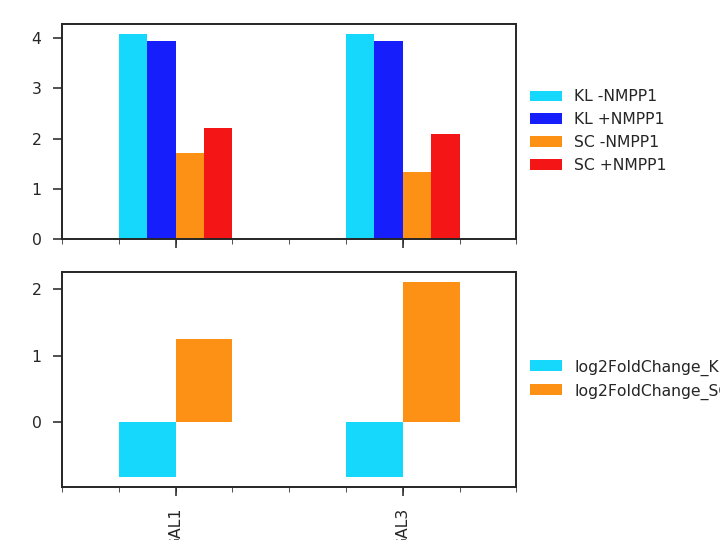

In [23]:
#plot fold change along with raw expression

genes_to_plot = ['GAL1', 'GAL3']

#

#['TSA2', 'HSP12', 'HSP26']

#metabolism ['HXT5', 'HXT3', 'CYC7', 'CYC1', 'YJL045W', 'SDH1', 'HXK1', 'HXK2', 'GLK1', 'EMI2', 'SHH4', 'SDH4', 'SLT1'] 
#Metabolism regev chart['HXK1','HXK2','GPM2','GPM3','ENO1','ENO2','PYK2','CDC19', 'CIT1', 'CIT2', 'IRC15','LPD1','YJL045W','SDH1','SHH3','SDH3','SHH4','SDH4']

#regulators  ['USV1','RGM1','SDP1','MSG5', 'TPK2', 'TOD6', 'DOT6', 'TPK3', 'TPK1' ]
#['XBP1','USV1','RGM1','SDP1','MSG5', 'CSR2','ECM21','BCY1', 'UBI4', 'BXI1', 'TPK1', 'TPK2', 'TPK3']

#pentose phosphate ['TKL2','TKL1','SOL4','SOL3','GND2','GND1','NQM1','TAL1','ZWF1','RKI1','RPE1']

fig, axarr = plt.subplots(2,1,sharex = True)

ax1 = axarr[0]

columns_to_plot = ['raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL',
       'raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC',
       'SC_common_name']

columns_rename = ['KL -NMPP1','KL +NMPP1','SC -NMPP1','SC +NMPP1','SC_common_name']

color_list = [(22.0/255.0,215.0/255.0,252.0/255.0),
              (22.0/255.0,30.0/255.0,252.0/255.0),
              (252.0/255.0,145.0/255.0,22.0/255.0),
              (244.0/255.0,22.0/255.0,22.0/255.0)]


plot_data = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(genes_to_plot)].loc[:,columns_to_plot]
plot_data.columns = columns_rename
plot_data.set_index('SC_common_name',inplace = True)
plot_data.loc[genes_to_plot].plot.bar(ax = ax1, color = color_list).legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax1.legend(bbox_to_anchor = [1,1])
plt.tight_layout(rect=[0,0,0.75,1])


ax2 = axarr[1]

color_list = [(22.0/255.0,215.0/255.0,252.0/255.0),
              (252.0/255.0,145.0/255.0,22.0/255.0)]

columns_to_plot = ['log2FoldChange_KL', 'log2FoldChange_SC','SC_common_name']
plot_data = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(genes_to_plot)].loc[:,columns_to_plot]
plot_data.set_index('SC_common_name',inplace = True)
plot_data.loc[genes_to_plot].plot.bar(ax = ax2, color = color_list).legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.legend(bbox_to_anchor = [1,1])

# Listing all the sc paralogs that get induced

<IPython.core.display.Javascript object>


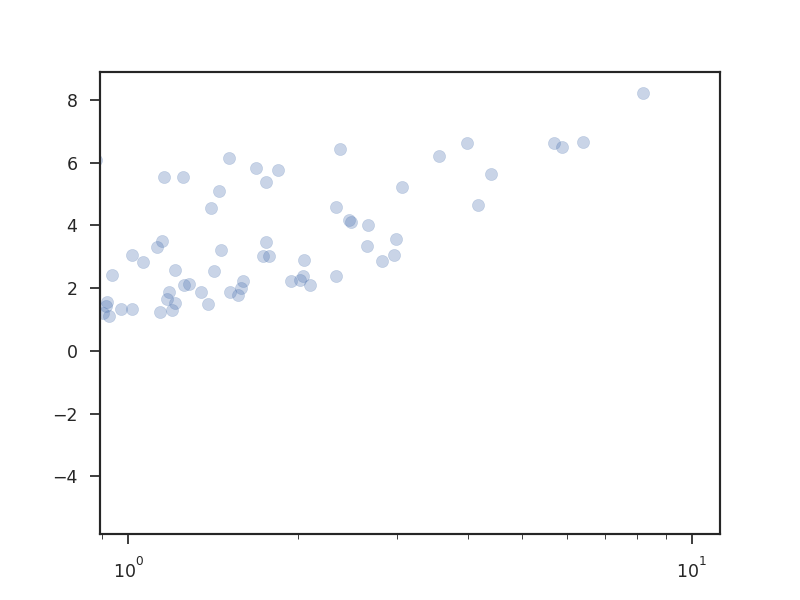

In [4]:
kl_sc_PKA_data_paralogs = kl_sc_PKA_data[kl_sc_PKA_data["N SCer Orthologs"]==2]
low_scpadj_paralog = []
high_scpadj_paralog = []

for kl_gene in list(set(kl_sc_PKA_data_paralogs['kl_genename'])):
    #kl_gene = 'KLLA0A00396g'
    paralogs_sorted_ind = kl_sc_PKA_data_paralogs[kl_sc_PKA_data_paralogs["kl_genename"]==kl_gene].sort_values(by = 'log2FoldChange_SC').index
    low_scpadj_paralog.append(paralogs_sorted_ind[0])
    high_scpadj_paralog.append(paralogs_sorted_ind[1])

plt.scatter(kl_sc_PKA_data_paralogs.loc[low_scpadj_paralog,'log2FoldChange_SC'],kl_sc_PKA_data_paralogs.loc[high_scpadj_paralog,'log2FoldChange_SC'], alpha=0.3)

In [93]:
#find all paralogs in which fold change is separated by at least N logs. 

foldchange_separation = 3.5

# column_subset = ['SC_common_name','N SCer Orthologs', 'kl_genename', 'sc_genename',
#        'log2FoldChange_KL', 'padj_KL',
#        'raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL',
#        'log2FoldChange_SC', 'padj_SC', 
#        'raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC']

kl_sc_PKA_data_paralogs = kl_sc_PKA_data[kl_sc_PKA_data["N SCer Orthologs"]==2]

separated_paralog_kl_genes = []

for kl_gene in list(set(kl_sc_PKA_data_paralogs['kl_genename'])):
    #kl_gene = 'KLLA0A00396g'
    paralogs_sorted = kl_sc_PKA_data_paralogs[kl_sc_PKA_data_paralogs["kl_genename"]==kl_gene].sort_values(by = 'log2FoldChange_SC')
    if paralogs_sorted['log2FoldChange_SC'].iloc[1]-paralogs_sorted['log2FoldChange_SC'].iloc[0] > foldchange_separation:
        separated_paralog_kl_genes.append(kl_gene)


paralog_sc_foldchange = kl_sc_PKA_data_paralogs[kl_sc_PKA_data_paralogs['kl_genename'].isin(separated_paralog_kl_genes)].loc[:, ['SC_common_name','kl_genename','sc_genename', 'log2FoldChange_SC', 'padj_SC','raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC', 'log2FoldChange_KL', 'padj_KL','raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL']]
paralog_sc_foldchange

,SC_common_name,kl_genename,sc_genename,log2FoldChange_SC,padj_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,log2FoldChange_KL,padj_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL
3942,STB6,KLLA0F26499g,YKL072W,-1.920920,8.038580e-04,1.448132,1.034468,1.168003,1.107299e-02,2.466569,2.909540
3943,STB2,KLLA0F26499g,YMR053C,3.272926,1.609293e-05,0.476136,1.484338,1.168003,1.107299e-02,2.466569,2.909540
3956,YMC2,KLLA0B08503g,YBR104W,-4.971720,3.625361e-35,2.686396,1.356552,-0.523493,2.842306e-01,2.199667,2.145525
3957,YMC1,KLLA0B08503g,YPR058W,-0.995521,5.702128e-03,2.495893,2.323990,-0.523493,2.842306e-01,2.199667,2.145525
3970,CST26,KLLA0B06820g,YBR042C,-0.729865,3.218560e-01,2.019949,1.988252,2.113390,7.197080e-06,1.582142,2.312664
3971,YDR018C,KLLA0B06820g,YDR018C,4.881522,4.403766e-21,0.760220,2.328609,2.113390,7.197080e-06,1.582142,2.312664
3972,SKT5,KLLA0E20263g,YBL061C,-1.806729,1.595645e-06,2.460149,2.056057,-0.380750,5.213292e-01,2.462343,2.466842
3973,SHC1,KLLA0E20263g,YER096W,3.793451,2.552990e-15,1.471903,2.754438,-0.380750,5.213292e-01,2.462343,2.466842
3978,GND2,KLLA0A09339g,YGR256W,7.143522,2.893844e-115,1.412570,3.676099,0.394234,4.085260e-01,3.570254,3.789341
3979,GND1,KLLA0A09339g,YHR183W,-1.190240,2.741071e-02,2.855015,2.639284,0.394234,4.085260e-01,3.570254,3.789341


In [106]:
paralog_sc_foldchange[paralog_sc_foldchange.log2FoldChange_KL<-3.5]

,SC_common_name,kl_genename,sc_genename,log2FoldChange_SC,padj_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,log2FoldChange_KL,padj_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL
4014,RPL15A,KLLA0F17633g,YLR029C,-4.289172,1.515695e-12,3.000724,1.954967,-4.882912,8.197845e-25,3.332889,1.984557
4015,RPL15B,KLLA0F17633g,YMR121C,-0.103786,8.728822e-01,2.507192,2.643034,-4.882912,8.197845e-25,3.332889,1.984557
4154,HXT5,KLLA0D13310g,YHR096C,7.987038,6.110086e-33,0.615321,2.956550,-4.550573,1.080356e-05,2.101754,1.103620
4155,HXT3,KLLA0D13310g,YDR345C,-2.024423,3.507051e-11,2.879786,2.398666,-4.550573,1.080356e-05,2.101754,1.103620
4286,DED1,KLLA0F01034g,YOR204W,-1.140894,2.667148e-01,1.017206,0.899828,-3.604341,1.786150e-17,2.637936,1.661746
4287,DBP1,KLLA0F01034g,YPL119C,3.990836,1.586911e-11,0.644953,1.890618,-3.604341,1.786150e-17,2.637936,1.661746
4372,ODC2,KLLA0D07073g,YOR222W,-2.194926,3.046935e-08,2.816112,2.280390,-4.935741,1.544053e-12,2.099553,0.732261
4373,ODC1,KLLA0D07073g,YPL134C,1.562426,4.014456e-01,1.338547,2.075871,-4.935741,1.544053e-12,2.099553,0.732261
4432,SSF2,KLLA0C14586g,YDR312W,-2.143268,7.580581e-11,2.256529,1.749244,-6.158367,1.431862e-39,2.912945,1.180878
4433,SSF1,KLLA0C14586g,YHR066W,-6.060665,3.121632e-48,2.849539,1.202337,-6.158367,1.431862e-39,2.912945,1.180878


,SC_common_name,kl_genename,sc_genename,log2FoldChange_SC,padj_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,log2FoldChange_KL,padj_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL


In [ ]:
#Looking at a "null distribution of randomly selected pairs of genes"

low_scpadj_paralog = []
high_scpadj_paralog = []

NN = 2000

for jj in range(0,NN):
    #kl_gene = 'KLLA0A00396g'
    rand_inds = random.sample(set(kl_sc_PKA_data.index), 2)
    kl_sc_data_pair = kl_sc_PKA_data.loc[rand_inds] 
    paralogs_sorted_ind = kl_sc_data_pair.sort_values(by = 'log2FoldChange_SC').index
    low_scpadj_paralog.append(paralogs_sorted_ind[0])
    high_scpadj_paralog.append(paralogs_sorted_ind[1])

plt.scatter(kl_sc_PKA_data.loc[low_scpadj_paralog,'log2FoldChange_SC'],kl_sc_PKA_data.loc[high_scpadj_paralog,'log2FoldChange_SC'], alpha=0.3)
plt.show()

# Check for influence of promoters using motif prior from roy lab

In [18]:
motif_prior = pd.read_table(data_processing_dir + os.path.normpath("/motifs/Motif_prior.txt"), header = None, names = ["TF","sc_genename","interaction_score"])


In [19]:
paralog_sc_foldchange_tfs = paralog_sc_foldchange.copy()
#shrink motif_prior to include only genes that are included on my subset list
motif_prior_subset = motif_prior[motif_prior["sc_genename"].isin(paralog_sc_foldchange_tfs['sc_genename'])]


In [21]:
paralog_sc_foldchange_tfs = paralog_sc_foldchange.copy()
tf_list = list(set(motif_prior_subset['TF']))

#Make a dataframe including interaction columns for all the TFs

for ind, tf in enumerate(tf_list): 
    #tf_common_name = tf_list_common_name[ind]
    paralog_sc_foldchange_tfs[tf] = 0.0

for ind,row in motif_prior_subset.iterrows():
    tf = row[0]
    gene = row[1]
    interaction_score = row[2]
    gene_ind = paralog_sc_foldchange_tfs[paralog_sc_foldchange_tfs['sc_genename']==gene].index
    paralog_sc_foldchange_tfs.loc[gene_ind,tf] = interaction_score
    paralog_sc_foldchange_tfs[paralog_sc_foldchange_tfs['sc_genename']==gene]


tf_list_common_name = io_library.SC_common_name_lookup(tf_list)

paralog_sc_foldchange_tfs.columns = list(paralog_sc_foldchange_tfs.columns[0:7]) + tf_list_common_name

paralog_sc_foldchange_tfs.to_csv(data_processing_dir + os.path.normpath("20170819_klscpka/diff_acting_paralogs_motif_prior.csv"))


FileNotFoundError: [Errno 2] No such file or directory: '/home/heineike/github/expression_broad_data/expression_data//20170819_klscpka/diff_acting_paralogs_motif_prior.csv'

In [24]:
paralog_sc_foldchange_tfs = pd.read_csv(data_processing_dir + os.path.normpath("20170817_klscpka/diff_acting_paralogs_motif_prior.csv"), index_col=0)


In [32]:
#Run linear regression on SC log fold change using TF columns as independent variables. 

y = paralog_sc_foldchange_tfs['log2FoldChange_SC']
X = paralog_sc_foldchange_tfs.iloc[:,7:]


#find correlated columns
X_corr = X.corr()
# np.sum(bool([X_corr>0.5].iloc[0,:]))

corr_val = 0.5

corr_dict = {}

ind = 'UPC2'

for ind, row in X_corr.iterrows():
    #X_corr_col = X_corr.loc[:,ind]
    output = row[row>corr_val]
    if len(output)>1: 
        corr_dict[ind] = output  #X_corr_col[X_corr_col>corr_val]


#Identify  correlated columns using nx.connected_components
corr_mat_subset = pd.DataFrame(0, index = corr_dict.keys(), columns = corr_dict.keys())

for gene1, links in corr_dict.items():
    link_list = list(set(links.index)-set([gene1]))
    for gene2 in link_list: 
        corr_mat_subset.loc[gene1,gene2] = 1

corr_graph = nx.from_pandas_adjacency(corr_mat_subset)
correlated_tfs = list(nx.connected_components(corr_graph))

keep_list = [list(tf_group)[0] for tf_group in correlated_tfs]

#Hard coded keep list based on genes I already know
hard_coded_keepers = {'GIS1':'MSN2','CAD1':'YAP1'}
for old_gene,new_gene in hard_coded_keepers.items():
    ind = keep_list.index(old_gene)
    keep_list[ind] = new_gene

columns_to_drop = []

for jj,corr_tf_group in enumerate(correlated_tfs):
    column_to_keep = keep_list[jj]
    new_columns_to_drop = list(corr_tf_group - set([column_to_keep]))
    columns_to_drop = columns_to_drop + new_columns_to_drop

X_uncorr = X.drop(columns_to_drop, axis = 1)

X_uncorr


['ACE2',
 'ADR1',
 'HAL9',
 'MIG3',
 'GAT4',
 'YRR1',
 'VHR2',
 'DOT6',
 'PHO4',
 'NRG1',
 'YAP1',
 'MSN2',
 'SPT15']

In [41]:
#fit a linear model 
lm = linear_model.LinearRegression()
model = lm.fit(X_uncorr,y)


In [44]:
ind_list = []
coeff_list = list(lm.coef_)
for ind,coeff in enumerate(lm.coef_):
    if abs(coeff) > 2.0:
        ind_list.append(ind)

[(tf_list_common_name[ind], coeff_list[ind]) for ind in ind_list]

[('ARG80', 3.5378999074712922),
 ('TBS1', -2.2124590110246678),
 ('CUP9', -2.3277602962410153),
 ('GAT4', 2.653730319813925),
 ('YAP7', 2.5518421311794302),
 ('SUA7', -2.0219667493379725),
 ('FYV5', 3.4441980663530227),
 ('STB5', 2.1521570380108939),
 ('NHP6B', 2.0804741552362778),
 ('YKL222C', 2.388431152290146),
 ('NRG1', -3.2469423814603204),
 ('HMLALPHA2', -3.063648728222168),
 ('HAP1', 2.0495322976243564),
 ('SUT1', -5.5577269186582923),
 ('STE12', 4.4372735136294592)]

In [46]:
pentose_phosphate_list = ['TKL2','TKL1','SOL4','SOL3','GND2','GND1','NQM1','TAL1','ZWF1','RKI1','RPE1']
B = paralog_sc_foldchange_tfs.loc[:, ['SC_common_name', 'XBP1']]
B[B['SC_common_name'].isin(pentose_phosphate_list)]

,SC_common_name,XBP1
3978,GND2,0.000000
3979,GND1,0.000000
4350,SOL4,0.000000
4351,SOL3,0.500000
4538,NQM1,0.875318
4539,TAL1,0.000000
4896,TKL2,0.000000
4897,TKL1,0.000000


In [93]:
'YIL101C' in tf_list

True

[('ARG80', 4.498426090113222),
 ('FZF1', 2.6492694934047618),
 ('ROX1', -2.2819212530050534),
 ('SPT10', 2.6774311807405757),
 ('DAT1', 2.6878898152233348),
 ('CBF1', 1.6573479057690201),
 ('HMO1', 2.8854127673516574),
 ('CAD1', 1.9669044869458496),
 ('HMS2', -2.6832241409072797),
 ('TBP-TFIIA', -2.1814961173347962),
 ('GAT1', 1.6470349410848337),
 ('HAP4', -1.740546204934394),
 ('YLR278C', 2.2187030294579428),
 ('ASH1', -1.8433234632193474),
 ('SPT23', 2.0016738914740864),
 ('RPH1', 3.0927499415005131),
 ('TBP-TFIIB', 4.1131259094550714),
 ('PDC2', -2.9575625322525032),
 ('KAR4', 1.9022562598549149),
 ('HMRA2', 3.0023071908663614),
 ('ACA1', 3.5319772333180208),
 ('RME1', -2.4933278742781599),
 ('WTM1', 2.4205064601233079),
 ('TDA9', 1.6516685689725825),
 ('HSF1', -2.0617019200173505),
 ('URC2', -1.5714984757155248),
 ('YKL222C', -1.528511155999053),
 ('YRR1', 1.9308246841624039),
 ('SFP1', -1.7474906886537005),
 ('RDS1', -1.5611716666600712),
 ('FYV5', -1.5236977414253619),
 ('NDT80'

In [43]:
paralog_sc_foldchange_tfs = paralog_sc_foldchange.copy()
#shrink motif_prior to include only genes that are included on my subset list


tf_list = list(set(motif_prior['TF']))
tf_list_common_name = io_library.SC_common_name_lookup(tf_list)

for ind, tf in enumerate(tf_list): 
    tf_common_name = tf_list_common_name[ind]
    print(tf_common_name)
    tf_interaction = []
    for gene in paralog_sc_foldchange_tfs['sc_genename']: 
        # tf = 'YDR213W'
        # gene =   'YER129W'  #'YMR124W' #
        motif_prior_tf = motif_prior[motif_prior['TF']==tf]
        motif_prior_tf_gene = motif_prior_tf[motif_prior_tf['sc_genename']==gene]
        if len(motif_prior_tf_gene) == 0: 
            interaction_score = 0.0
        else: 
            interaction_score = float(motif_prior_tf_gene['interaction_score'])            

        tf_interaction.append(interaction_score)
    paralog_sc_foldchange_tfs[tf_common_name] = tf_interaction

paralog_sc_foldchange_tfs

UPC2
ARG80
RSF2
TYE7
CST6
STB5
HMS1
REI1
YOX1
MSS11
HAL9
FZF1
MIG3
STP3
YGR067C
HEL2
ROX1
USV1
CAT8
SPT10
RDS2
MBP1
DAT1
CIN5
MIG1
MET31
STP2
CBF1
YER109C
TBS1
MOT2
YPR196W
STB4
RDR1
GAT4
ZAP1
CEP3
PHD1
HMO1
MCM1
CAD1
RFX1
SPT2
HMS2
CRZ1
SUT1
AZF1
TBP-TFIIA
GAT1
WAR1
SMK1
YNR063W
ACE2
AFT1
GTS1
LYS14
CUP9
MGA1
HAP4
COM2
SFL1
PHO2
YLR278C
GSM1
YLL054C
SDD4
SUM1
ASH1
EDS1
PDR3
RGT1
ASG1
SPT23
RPH1
MSN2
DAL82
TBP-TFIIB
SUT2
GZF3


KeyboardInterrupt: 

# Fimo Analysis

In [ ]:
#Make functions for running meme analysis in io library
    #make_promoter_files
    #make_motif_file
    #run_meme_analysis
    #add_meme_results
#Run meme analysis

In [84]:
#Make promoter files for meme analysis

fname_prefix = '20171011_pent_metab_'
#gene_list = ['TKL2','TKL1','SOL4','SOL3','GND2','GND1','NQM1','TAL1','ZWF1','RKI1','RPE1']
#gene_list = ['TKL2','TKL1','SOL4','SOL3','GND2','GND1','NQM1','TAL1','ZWF1','RKI1','RPE1',  #pentose phosphate
#             'HXT5', 'HXT3', 'CYC7', 'CYC1', 'YJL045W', 'SDH1', 'HXK1', 'HXK2', 'GLK1', 'EMI2', 'SHH4', 'SDH4',  #Other respiration
#             'USV1','RGM1','SDP1','MSG5',  #regulators
#             'HSP12','HSP26'] #Controls
gene_list =

promoter_fname_kl, promoter_fname_sc = io_library.make_meme_promoter_files(gene_list, fname_prefix, kl_sc_PKA_data)
        


In [117]:
promoter_fname_kl

I am importing io_library
what computer are you on? a = Bens, b = gpucluster, c = other   b
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/


'/home/heineike/github/expression_broad_data/expression_data/kl_promoters/promoter_sets/20171011_pent_metab__kl.fasta'

In [ ]:
promoters = SeqIO.parse(data_processing_dir + os.path.normpath("sc_promoters/promoter_sets/20171011_pent_metab__sc.fasta"),"fasta")
record = next(promoters)

In [143]:
#Searches for exact matches of defined motifs in various sequences
motif_dict = {'STRE':'CCCCT',
             'test': 'TATAT'}


motif = motif_dict['test']

#for record in SeqIO.parse(data_processing_dir + os.path.normpath("sc_promoters/promoter_sets/20171011_pent_metab__sc.fasta"),"fasta"):
#fwd search
prom_seq_fwd = str(record.seq)
[m.start() for m in re.finditer(motif, prom_seq_fwd)]
#to find overlapping motifs
#[m.start() fr m in re.finditer('(?=' + motif + ')', prom_seq_rev)]

#rev search
prom_seq_rev = str(record.seq.reverse_complement())
[m.start() for m in re.finditer(motif, prom_seq_rev)]


[117, 169, 219]

In [142]:
prom_seq_rev

"<bound method Seq.reverse_complement of Seq('GGAAAAAATTTTTAGGCTCGAGAACAATAGGGCGAAAAAACAGGCAACGAACGA...ATA', SingleLetterAlphabet())>"

In [85]:
#Runs fimo for both species for all motifs on the selected promoters

promoter_fnames = {'SC': promoter_fname_sc, 'KL': promoter_fname_kl}

fimo_fnames_out = {}

thresh = 0.001
for spec in ['SC','KL']:
    promoter_fname = promoter_fnames[spec]
    file_prefix = fname_prefix + '_all_jaspar_' + spec 
    output_dir = data_processing_dir + spec.lower() + os.path.normpath('_promoters/fimo_output')
    fimo_fnames_out[spec] = io_library.run_fimo_command(promoter_fname, thresh, fname_prefix, output_dir)
    

fimo output return code = 0
fimo output return code = 0


In [86]:
#Make a table of fimo results combining data for each species with genes along the y axis. 

#Display results of motif scan in table 
columns_to_plot = ['log2FoldChange_KL', 'log2FoldChange_SC','SC_common_name','kl_genename','sc_genename']
plot_data = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(gene_list)].loc[:,columns_to_plot]
plot_data.set_index('SC_common_name',inplace = True)
plot_data = plot_data.loc[gene_list]

#motifs= ['MSN2','XBP1','CAT8','CBF1','HSF1']

#all motifs: 
motif_dict = io_library.build_motif_dict()
motifs = list(motif_dict.values())


for spec in ['KL','SC']:

    fimo_results_spec = pd.read_table(fimo_fnames_out[spec])
 
    for motif in motifs : 
        motif_column_spec = []
        for sc_common_name in gene_list:
            name = plot_data.loc[sc_common_name][spec.lower()+ '_genename']
            results_motif_name = fimo_results_spec[(fimo_results_spec['motif_alt_id']==motif)&(fimo_results_spec['sequence_name']==name)]
            #result = "{:d} hits: ".format(len(results_motif_name.index)) + ";".join(["score: {:.1f} , loc: {:d}".format(results_motif_name['score'].loc[ind], results_motif_name['start'].loc[ind]) + ")" for ind in results_motif_name.index])
            result = len(results_motif_name.index)
            motif_column_spec.append(result)
    
        plot_data[motif + "_" + spec] = motif_column_spec    



fname_presence_all_motifs = data_processing_dir + os.path.normpath("motifs/" + fname_prefix + "_all_motifs.csv")
plot_data.to_csv(fname_presence_all_motifs)
#results_motif_name_summary = print("({}) ".format(len(results_motif_name.index)))

In [87]:
motif_presence = pd.read_csv(data_processing_dir + os.path.normpath("motifs/" + fname_prefix + "_all_motifs.csv"),index_col=0)

In [88]:
tf_subset = [ 'GIS1', 'MSN2','XBP1']#"HAP2", "HAP5", "GIS1", "USV1", "GIS1", "AFT1", "MCM1", "SRD1", "ECM23", "HAP3",
             #"TDA9", "HSF1", "CST6", "RPH1", "MSN4", "MSN2", "ROX1", "ABF1", 
             #"FKH2", "STB5",  "STP2", "RME1", "IME1", "RDS2", "CHA4", "XBP1"]
tf_subset_sc = [tf+"_SC" for tf in tf_subset]
motif_presence.loc[:, list(motif_presence.columns[0:4]) + tf_subset_sc]

,log2FoldChange_KL,log2FoldChange_SC,kl_genename,sc_genename,GIS1_SC,MSN2_SC,XBP1_SC
SC_common_name,,,,,,,
TKL2,-1.125151,7.553395,KLLA0B09152g,YBR117C,2,1,0
TKL1,-1.125151,-3.322902,KLLA0B09152g,YPR074C,1,1,6
SOL4,1.734949,7.194901,KLLA0A05390g,YGR248W,3,1,2
SOL3,1.734949,-0.150099,KLLA0A05390g,YHR163W,1,1,4
GND2,0.394234,7.143522,KLLA0A09339g,YGR256W,3,2,0
GND1,0.394234,-1.190240,KLLA0A09339g,YHR183W,1,1,4
NQM1,-0.307250,6.817958,KLLA0A02607g,YGR043C,4,3,0
TAL1,-0.307250,-0.212188,KLLA0A02607g,YLR354C,1,1,4
ZWF1,-1.847081,1.886067,KLLA0D19855g,YNL241C,6,5,0


In [111]:
fimo_fnames_out

{'KL': '/home/heineike/github/expression_broad_data/expression_data/kl_promoters/fimo_output/20171011_pent_metab__fimo.txt',
 'SC': '/home/heineike/github/expression_broad_data/expression_data/sc_promoters/fimo_output/20171011_pent_metab__fimo.txt'}

In [115]:
#Load the fasta files for promoters as seqIO items. 

#Load the fimo database: 
fimo_results_SC = pd.read_table(data_processing_dir + os.path.normpath("sc_promoters/fimo_output/20171011_pent_metab__fimo.txt"))


tf_subset = ["HAP2", "HAP5", "GIS1", "USV1", "GIS1", "AFT1", "MCM1", "SRD1", "ECM23", "HAP3",
             "TDA9", "HSF1", "CST6", "RPH1", "MSN4", "MSN2", "ROX1", "ABF1", 
             "FKH2", "STB5",  "STP2", "RME1", "IME1", "RDS2", "CHA4", "XBP1"]
tf_subset_sc = [tf+"_SC" for tf in tf_subset]

cmap = plt.get_cmap('hsv')
N = len(tf_subset)
cmap_discrete = [cmap(nn/N) for nn in range(0,N)]
#cmap=plt.get_cmap('tab10')
hex_colors = []

for rgb_color in cmap_discrete:
    int_color = tuple(int(rgb_element*255) for rgb_element in rgb_color)
    hex_colors.append('#{:02x}{:02x}{:02x}'.format(*int_color))

tf_color_dict = dict(zip(tf_subset,hex_colors))

sc_common_name_lookup = dict(zip(motif_presence['sc_genename'],motif_presence.index))

for record in SeqIO.parse(data_processing_dir + os.path.normpath("sc_promoters/promoter_sets/20171011_pent_metab__sc.fasta"),"fasta"):
    gene = record.id
    print(gene)
    gb_record = record
    gb_record.seq.alphabet = generic_dna
    gb_record.name = sc_common_name_lookup[gene]
    
    fimo_results_SC_gene = fimo_results_SC[fimo_results_SC['sequence_name']==gene]
    for motif in tf_subset: 
        #export to genbank
        fimo_results_SC_gene_tf = fimo_results_SC_gene[fimo_results_SC_gene['motif_alt_id']==motif]
        if len(fimo_results_SC_gene_tf)>0: 
            for ind, row in fimo_results_SC_gene_tf.iterrows():
                my_start_pos = sf.ExactPosition(row['start'])
                my_end_pos = sf.ExactPosition(row['stop'])
                my_strand = int(row['strand'] + "1")
                my_feature_location = sf.FeatureLocation(my_start_pos,my_end_pos, strand=my_strand)
                my_feature = sf.SeqFeature(my_feature_location,type="protein_bind", 
                                           qualifiers={'label':motif, 'ApEinfo_revcolor': tf_color_dict[motif], 'ApEinfo_fwdcolor': tf_color_dict[motif]})
                gb_record.features.append(my_feature)


    #print(gb_record.format("gb"))
    with open(data_processing_dir + os.path.normpath("sc_promoters/promoter_sets_annotated/"+ sc_common_name_lookup[gene] + "_annot.gb"), "w") as output_handle:
        SeqIO.write(gb_record, output_handle, "gb")
#go through each one and add motif features


# for record in SeqIO.parse(data_processing_dir + os.path.normpath("sc_promoters/promoter_sets_annotated/pbmh117pan953.gb"),"genbank"):
#     print(record.features)

#https://www2.warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/genbank/


YJR048W
YNL053W
YDR178W
YMR182C
YGR043C
YCL040W
YGR248W
YJL045W
YHR096C
YPR074C
YOR095C
YPL230W
YHR183W
YKL148C
YLR164W
YGR256W
YIL113W
YFL014W
YDR516C
YHR163W
YLR354C
YDR345C
YFR053C
YBR117C
YJL121C
YEL039C
YNL241C
YBR072W
YGL253W


In [ ]:
promoters = SeqIO.parse(data_processing_dir + os.path.normpath("sc_promoters/promoter_sets/20171011_pent_metab__sc.fasta"),"fasta")
record = next(promoters)

In [188]:
motif_presence


,log2FoldChange_KL,log2FoldChange_SC,kl_genename,sc_genename,SFL1_KL,GAT1_KL,NRG1_KL,RSC30_KL,ECM23_KL,MET28_KL,...,MIG3_SC,STP4_SC,GSM1_SC,TATA3,STRE,TATA6,TATA1,TATA4,TATA5,TATA2
SC_common_name,,,,,,,,,,,,,,,,,,,,,
TKL2,-1.125151,7.553395,KLLA0B09152g,YBR117C,7,1,0,0,0,0,...,2,1,0,0,0,0,1,0,4,0
TKL1,-1.125151,-3.322902,KLLA0B09152g,YPR074C,7,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
SOL4,1.734949,7.194901,KLLA0A05390g,YGR248W,3,4,1,0,0,0,...,2,1,0,0,1,0,1,0,0,1
SOL3,1.734949,-0.150099,KLLA0A05390g,YHR163W,3,4,1,0,0,0,...,1,0,3,0,1,0,0,0,0,0
GND2,0.394234,7.143522,KLLA0A09339g,YGR256W,3,1,2,0,0,0,...,1,0,3,0,3,1,0,1,0,0
GND1,0.394234,-1.190240,KLLA0A09339g,YHR183W,3,1,2,0,0,0,...,2,0,0,1,3,0,0,0,6,0
NQM1,-0.307250,6.817958,KLLA0A02607g,YGR043C,9,2,0,0,0,0,...,2,2,2,0,1,0,0,0,0,0
TAL1,-0.307250,-0.212188,KLLA0A02607g,YLR354C,9,2,0,0,0,0,...,0,3,1,0,0,0,0,0,2,1
ZWF1,-1.847081,1.886067,KLLA0D19855g,YNL241C,6,1,1,0,0,0,...,0,3,4,0,2,0,0,1,2,0


In [187]:
for key in motif_dict.keys():
    new_column = []
    for item in n_motifs:
        new_column.append(item[key])
    motif_presence[key] = new_column

In [183]:
#Search for exact custom motifs: 


#Searches for exact matches of defined motifs in various sequences
motif_dict = {'STRE':'CCCCT',
             'TATA1': 'TATATAAA', 
             'TATA2': 'TATATAAG',
             'TATA3': 'TATAAATA',
             'TATA4': 'TATAAAAG',
             'TATA5': 'TATATATA',
             'TATA6': 'TATAAAAA'}

motif_color_dict = io_library.hex_color_dictionary(motif_dict.keys())

sc_common_name_lookup = dict(zip(motif_presence['sc_genename'],motif_presence.index))

n_motifs = []

for record in SeqIO.parse(data_processing_dir + os.path.normpath("sc_promoters/promoter_sets/20171011_pent_metab__sc.fasta"),"fasta"):
    gene = record.id
    print(gene)
    gb_record = record
    gb_record.seq.alphabet = generic_dna
    gb_record.name = sc_common_name_lookup[gene] 
    
    #search for motifs
    #record the motif as a feature in the genome
    #record the number of motifs in the motif_presence dataframe
    
    n_motifs_gene = {motif_name:0 for motif_name in motif_dict.keys() }
    
    for motif_name, motif in motif_dict.items():
        L_motif = len(motif)
        
        #fwd search
        prom_seq_fwd = str(gb_record.seq)
        motif_sites_fwd = [m.start() for m in re.finditer(motif, prom_seq_fwd)]
        #to find overlapping motifs
        #[m.start() fr m in re.finditer('(?=' + motif + ')', prom_seq_rev)]
        
        #record each found motif as a feature
        if len(motif_sites_fwd)>0:
            for site in motif_sites_fwd: 
                my_start_pos = sf.ExactPosition(site)
                my_end_pos = sf.ExactPosition(site + L_motif)
                my_strand = 1
                my_feature_location = sf.FeatureLocation(my_start_pos,my_end_pos, strand=my_strand)
                my_feature = sf.SeqFeature(my_feature_location,type="protein_bind", 
                                           qualifiers={'label':motif_name, 'ApEinfo_revcolor': motif_color_dict[motif_name], 'ApEinfo_fwdcolor': motif_color_dict[motif_name]})
                gb_record.features.append(my_feature)
        
        #rev search
        prom_seq_rev = str(record.seq.reverse_complement())
        #location is in reference to the fwd seq
        motif_sites_rev = [len(prom_seq_rev) - m.start() - L_motif for m in re.finditer(motif, prom_seq_rev)]
        if len(motif_sites_rev)>0:
            for site in motif_sites_rev: 
                my_start_pos = sf.ExactPosition(site)
                my_end_pos = sf.ExactPosition(site + L_motif)
                my_strand = -1
                my_feature_location = sf.FeatureLocation(my_start_pos,my_end_pos, strand=my_strand)
                my_feature = sf.SeqFeature(my_feature_location,type="protein_bind", 
                                           qualifiers={'label':motif_name, 'ApEinfo_revcolor': motif_color_dict[motif_name], 'ApEinfo_fwdcolor': motif_color_dict[motif_name]})
                gb_record.features.append(my_feature)
        
        n_motifs_gene[motif_name] = len(motif_sites_fwd)+len(motif_sites_rev)
    
    n_motifs.append(n_motifs_gene)
    
    #calculate the AT% for each gene and record it ?
#     fimo_results_SC_gene = fimo_results_SC[fimo_results_SC['sequence_name']==gene]
#     for motif in tf_subset: 
#         #export to genbank
#         fimo_results_SC_gene_tf = fimo_results_SC_gene[fimo_results_SC_gene['motif_alt_id']==motif]
#         if len(fimo_results_SC_gene_tf)>0: 
#             for ind, row in fimo_results_SC_gene_tf.iterrows():
#                 my_start_pos = sf.ExactPosition(row['start'])
#                 my_end_pos = sf.ExactPosition(row['stop'])
#                 my_strand = int(row['strand'] + "1")
#                 my_feature_location = sf.FeatureLocation(my_start_pos,my_end_pos, strand=my_strand)
#                 my_feature = sf.SeqFeature(my_feature_location,type="protein_bind", 
#                                            qualifiers={'label':motif, 'ApEinfo_revcolor': tf_color_dict[motif], 'ApEinfo_fwdcolor': tf_color_dict[motif]})
#                 gb_record.features.append(my_feature)


    #print(gb_record.format("gb"))
    with open(data_processing_dir + os.path.normpath("sc_promoters/promoter_sets_annotated/"+ sc_common_name_lookup[gene] + "_exact_motif_annot.gb"), "w") as output_handle:
        SeqIO.write(gb_record, output_handle, "gb")
#go through each one and add motif features


# for record in SeqIO.parse(data_processing_dir + os.path.normpath("sc_promoters/promoter_sets_annotated/pbmh117pan953.gb"),"genbank"):
#     print(record.features)

#https://www2.warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/genbank/

YJR048W
YNL053W
YDR178W
YMR182C
YGR043C
YCL040W
YGR248W
YJL045W
YHR096C
YPR074C
YOR095C
YPL230W
YHR183W
YKL148C
YLR164W
YGR256W
YIL113W
YFL014W
YDR516C
YHR163W
YLR354C
YDR345C
YFR053C
YBR117C
YJL121C
YEL039C
YNL241C
YBR072W
YGL253W


In [51]:
#convert tab10 colormap colors to hex colors
cmap = plt.get_cmap('hsv')
N = len(tf_subset)
cmap_discrete = [cmap(nn/N) for nn in range(0,N)]
#cmap=plt.get_cmap('tab10')
hex_colors = []

for rgb_color in cmap_discrete:
    int_color = tuple(int(rgb_element*255) for rgb_element in rgb_color)
    hex_colors.append('#{:02x}{:02x}{:02x}'.format(*int_color))

tf_color_dict = dict(zip(tf_subset,hex_colors))

['#ff0000',
 '#ff3500',
 '#ff7000',
 '#ffab00',
 '#ffe600',
 '#dcff00',
 '#a1ff00',
 '#6cff00',
 '#31ff00',
 '#02ff0b',
 '#00ff44',
 '#00ff7f',
 '#00ffba',
 '#00fff5',
 '#00d2ff',
 '#0097ff',
 '#005cff',
 '#0021ff',
 '#1900ff',
 '#5400ff',
 '#8900ff',
 '#c400ff',
 '#f900f9',
 '#ff00c3',
 '#ff0088',
 '#ff004d']

In [50]:
cmap(1.0)

(1.0, 0.0, 0.09375, 1.0)

In [ ]:
# 1. Create a sequence

from Bio.Seq import Seq
my_sequence = Seq("GATCGATCGATCGATCGATCGATCGATCGATC")

# 2. Create a SeqRecord and assign the sequence to it

from Bio.SeqRecord import SeqRecord
my_sequence_record = SeqRecord(my_sequence)

# 3. Assign an alphabet to the sequence (in this case DNA)

from Bio.Alphabet import generic_dna
my_sequence_record.seq.alphabet = generic_dna

# This is the minimum required info for BioPython to be able to output 
# the SeqRecord in Genbank format.
# You probably would want to add other info (e.g. locus, organism, date etc)

#optional: print the SeqRecord to STDOUT in genbank format.. note there are no features on it yet.
print "\nThis bit is the SeqRecord, printed out in genbank format, with no features added.\n"
print(my_sequence_record.format("gb"))

# 1. Create a start location and end location for the feature
#    Obviously this can be AfterPosition, BeforePosition etc.,
#    to handle ambiguous or unknown positions

from Bio import SeqFeature
my_start_pos = SeqFeature.ExactPosition(2)
my_end_pos = SeqFeature.ExactPosition(6)

# 2. Use the locations do define a FeatureLocation
from Bio.SeqFeature import FeatureLocation
my_feature_location = FeatureLocation(my_start_pos,my_end_pos)

# 3. Define a feature type as a text string 
#     (you can also just add the type when creating the SeqFeature)
my_feature_type = "CDS"

# 4. Create a SeqFeature
from Bio.SeqFeature import SeqFeature
my_feature = SeqFeature(my_feature_location,type=my_feature_type)

# 5. Append your newly created SeqFeature to your SeqRecord

my_sequence_record.features.append(my_feature)

#optional: print the SeqRecord to STDOUT in genbank format, with your new feature added.
print "\nThis bit is the SeqRecord, printed out in genbank format, with a feature added.\n"
print(my_sequence_record.format("gb"))


# STRE presence in large subset of genes

In [4]:
kl_sc_PKA_data_paralogs = kl_sc_PKA_data[kl_sc_PKA_data["N SCer Orthologs"]==2]
# low_scpadj_paralog = []
# high_scpadj_paralog = []

# for kl_gene in list(set(kl_sc_PKA_data_paralogs['kl_genename'])):
#     #kl_gene = 'KLLA0A00396g'
#     paralogs_sorted_ind = kl_sc_PKA_data_paralogs[kl_sc_PKA_data_paralogs["kl_genename"]==kl_gene].sort_values(by = 'log2FoldChange_SC').index
#     low_scpadj_paralog.append(paralogs_sorted_ind[0])
#     high_scpadj_paralog.append(paralogs_sorted_ind[1])

# plt.scatter(kl_sc_PKA_data_paralogs.loc[low_scpadj_paralog,'log2FoldChange_SC'],kl_sc_PKA_data_paralogs.loc[high_scpadj_paralog,'log2FoldChange_SC'], alpha=0.3)

In [1]:
#find all paralogs in which fold change is separated by at least N logs. 

foldchange_separation = 3.5

# column_subset = ['SC_common_name','N SCer Orthologs', 'kl_genename', 'sc_genename',
#        'log2FoldChange_KL', 'padj_KL',
#        'raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL',
#        'log2FoldChange_SC', 'padj_SC', 
#        'raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC']

kl_sc_PKA_data_paralogs = kl_sc_PKA_data[kl_sc_PKA_data["N SCer Orthologs"]==2]

separated_paralog_kl_genes = []

for kl_gene in list(set(kl_sc_PKA_data_paralogs['kl_genename'])):
    #kl_gene = 'KLLA0A00396g'
    paralogs_sorted = kl_sc_PKA_data_paralogs[kl_sc_PKA_data_paralogs["kl_genename"]==kl_gene].sort_values(by = 'log2FoldChange_SC')
    if paralogs_sorted['log2FoldChange_SC'].iloc[1]-paralogs_sorted['log2FoldChange_SC'].iloc[0] > foldchange_separation:
        separated_paralog_kl_genes.append(kl_gene)


paralog_sc_foldchange = kl_sc_PKA_data_paralogs[kl_sc_PKA_data_paralogs['kl_genename'].isin(separated_paralog_kl_genes)].loc[:, ['SC_common_name','kl_genename','sc_genename', 'log2FoldChange_SC', 'padj_SC','raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC', 'log2FoldChange_KL', 'padj_KL','raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL']]


NameError: name 'kl_sc_PKA_data' is not defined

In [48]:
#Add in number of STRE sites (and tata boxes)

#?option to write files. No - make that a separate function. 

#Search for exact custom motifs: 

gene_list = paralog_sc_foldchange['sc_genename']
#must be primary key of promoter data structure 

#Searches for exact matches of defined motifs in various sequences
motif_dict = {'STRE':'CCCCT',
             'TATA1': 'TATATAAA', 
             'TATA2': 'TATATAAG',
             'TATA3': 'TATAAATA',
             'TATA4': 'TATAAAAG',
             'TATA5': 'TATATATA',
             'TATA6': 'TATAAAAA',
             'AAGGGT': 'AAGGGT',
             'AAGGGG': 'AAGGGG'}

sc_promoters = pd.read_pickle(base_dir + os.sep + os.path.join("expression_data","sc_promoters","sc_promoters.pkl"))
promoter_database = sc_promoters

#Generate promoter subset

promoter_counts = io_library.exact_promoter_scan(gene_list, motif_dict, promoter_database)

paralog_sc_foldchange_motifs = paralog_sc_foldchange.join(promoter_counts, on='sc_genename')   


In [50]:
paralog_sc_foldchange_motifs[paralog_sc_foldchange_motifs['SC_common_name'].isin(['USV1','RGM1','NRG1'])]

,SC_common_name,kl_genename,sc_genename,log2FoldChange_SC,padj_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,log2FoldChange_KL,padj_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL,AAGGGG,TATA3,TATA6,STRE,TATA2,AAGGGT,TATA5,TATA1,TATA4
4466,RGM1,KLLA0C16005g,YMR182C,0.506873,8.897421e-01,0.182626,0.276354,0.710576,0.3284,1.69176,1.982482,0,0,0,1,0,0,0,0,0
4467,USV1,KLLA0C16005g,YPL230W,5.035661,2.994282e-41,1.508849,3.138201,0.710576,0.3284,1.69176,1.982482,3,0,0,6,0,1,0,0,0


In [53]:
#plot paralogs in plotly using color to display difference between stre for high and low

paralog_sc_foldchange_motifs


low_paralog_FC = []
high_paralog_FC = []
low_paralog_motifs = []
high_paralog_motifs = []
hover_text = []
high_paralogs = []
low_paralogs = []

motif = 'STRE'

for kl_gene in list(set(paralog_sc_foldchange_motifs['kl_genename'])):
    #kl_gene = 'KLLA0A00396g'
    paralogs_sorted_ind = paralog_sc_foldchange_motifs[paralog_sc_foldchange_motifs["kl_genename"]==kl_gene].sort_values(by = 'log2FoldChange_SC').index
    low_paralog = paralog_sc_foldchange_motifs.loc[paralogs_sorted_ind[0]]
    high_paralog = paralog_sc_foldchange_motifs.loc[paralogs_sorted_ind[1]]
    
    high_paralogs.append(high_paralog)
    low_paralogs.append(low_paralog)
    
    low_paralog_FC.append(low_paralog['log2FoldChange_SC'])
    high_paralog_FC.append(high_paralog['log2FoldChange_SC'])
    low_paralog_motifs.append(low_paralog[motif])
    high_paralog_motifs.append(high_paralog[motif])
    
    
    hover_text.append(('High gene {high_SC_common_name}<br>' + 
                      'High '+ motif + ' sites: {high_sites}<br>'+
                      'Low gene {low_SC_common_name}<br>' +
                      'Low ' + motif + ' sites: {low_sites}<br>').format(high_SC_common_name=high_paralog['SC_common_name'],
                                            high_sites=high_paralog[motif],
                                            low_SC_common_name=low_paralog['SC_common_name'],
                                            low_sites=low_paralog[motif]))




['FAT3',
 'FUN19',
 'GIP2',
 'GPD1',
 'CIT1',
 'YJR115W',
 'EMP46',
 'PRY1',
 'PRM6',
 'ATG33',
 'SPI1',
 'GAC1',
 'GPP2',
 'YJL045W',
 'GPM2',
 'TPK1',
 'NQM1',
 'YDR018C',
 'YHR033W',
 'EGO4',
 'RTN2',
 'FAA1',
 'YOL131W',
 'RNR3',
 'YKL091C',
 'STB2',
 'GGA1',
 'LSO1',
 'BAG7',
 'TSA2',
 'SOL4',
 'SSF2',
 'GSP2',
 'URA8',
 'CYC7',
 'DAL80',
 'RPL15B',
 'HXK1',
 'YDR034W-B',
 'YLR225C',
 'HEF3',
 'TCB1',
 'TSL1',
 'DOT6',
 'MMT2',
 'YHR097C',
 'SDP1',
 'AIR2',
 'PGM2',
 'PRS2',
 'GND2',
 'DBP1',
 'YPT53',
 'USV1',
 'GRS2',
 'PEX18',
 'YMC1',
 'HXT5',
 'PIR3',
 'NDE2',
 'LEU4',
 'IGD1',
 'YCL048W-A',
 'FPR3',
 'SLF1',
 'TMN2',
 'SSE2',
 'ODC1',
 'SDS24',
 'CRF1',
 'TKL2',
 'ELO1',
 'SHC1',
 'RTC2',
 'GDH3',
 'URA10',
 'SHH4',
 'HVG1',
 'MPC3',
 'LRE1',
 'SHH3']

In [55]:

fig = [
    {
        'x': low_paralog_FC,
        'y': high_paralog_FC,
        'text': hover_text,
        'mode': 'markers',
        'marker': {
            'cmax': 5,
            'cmin': -5,
            'color': np.array(high_paralog_motifs)-np.array(low_paralog_motifs),
            #'size': kl_sc_PKA_data_motif_hits['sc_' + motif + '_hits']+1,
            'sizeref': 0.2,
            'showscale': True
        }
    }
]



py.iplot(fig, filename=motif+ '_and_paralog_exp_diff')

In [10]:
#plot paralogs in plotly using color to display kl fold change

kl_sc_PKA_data_paralogs = kl_sc_PKA_data[kl_sc_PKA_data["N SCer Orthologs"]==2]


low_paralog_FC = []
high_paralog_FC = []
low_paralog_motifs = []
high_paralog_motifs = []
hover_text = []
high_paralogs = []
low_paralogs = []
kl_FC = []

for kl_gene in list(set(kl_sc_PKA_data_paralogs['kl_genename'])):
    #kl_gene = 'KLLA0A00396g'
    paralogs_sorted_ind = kl_sc_PKA_data_paralogs[kl_sc_PKA_data_paralogs["kl_genename"]==kl_gene].sort_values(by = 'log2FoldChange_SC').index
    low_paralog = kl_sc_PKA_data_paralogs.loc[paralogs_sorted_ind[0]]
    high_paralog = kl_sc_PKA_data_paralogs.loc[paralogs_sorted_ind[1]]
    
    high_paralogs.append(high_paralog)
    low_paralogs.append(low_paralog)
    
    low_paralog_FC.append(low_paralog['log2FoldChange_SC'])
    high_paralog_FC.append(high_paralog['log2FoldChange_SC'])
    kl_FC.append(high_paralog['log2FoldChange_KL'])
    
    hover_text.append(('High gene {high_SC_common_name}<br>' + 
                      'Low gene {low_SC_common_name}<br>' +
                      'KL fold change {kl_fold_change:.2f}').format(high_SC_common_name=high_paralog['SC_common_name'],
                                            low_SC_common_name=low_paralog['SC_common_name'],
                                            kl_fold_change = high_paralog['log2FoldChange_KL']))


In [12]:
fig = [
    {
        'x': low_paralog_FC,
        'y': high_paralog_FC,
        'text': hover_text,
        'mode': 'markers',
        'marker': {
            'cmax': 7,
            'cmin': -7,
            'color': kl_FC,
            #'size': kl_sc_PKA_data_motif_hits['sc_' + motif + '_hits']+1,
            'sizeref': 0.2,
            'showscale': True
        }
    }
]



py.iplot(fig, filename='Scer paralog expression, KLac expression overlay')

In [47]:
sc_paralog_dict = {'high': high_paralogs, 'low': low_paralogs}

for key, paralogs in sc_paralog_dict.items(): 
    gene_list = [paralog['SC_common_name'] for paralog in paralogs]
    promoter_fname_kl, promoter_fname_sc = io_library.make_meme_promoter_files(gene_list, key + '_paralogs_scfcsep_3p5', kl_sc_PKA_data)

In [43]:
promoter_fname_sc

'/home/heineike/github/expression_broad_data/expression_data/sc_promoters/promoter_sets/paralogs_scfcsep_3p5_sc.fasta'